In [188]:
data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv'

In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [190]:
#!wget -O CreditScoring.csv {data}

In [191]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


# EDA

In [192]:
df.dtypes

Status       int64
Seniority    int64
Home         int64
Time         int64
Age          int64
Marital      int64
Records      int64
Job          int64
Expenses     int64
Income       int64
Assets       int64
Debt         int64
Amount       int64
Price        int64
dtype: object

In [193]:
df.nunique()

Status          3
Seniority      47
Home            7
Time           11
Age            50
Marital         6
Records         2
Job             5
Expenses       94
Income        353
Assets        160
Debt          183
Amount        285
Price        1419
dtype: int64

In [194]:
df.isnull().sum()

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

In [195]:
df.columns = df.columns.str.lower()
df.columns.tolist()

['status',
 'seniority',
 'home',
 'time',
 'age',
 'marital',
 'records',
 'job',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

In [196]:
df.describe().round()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


# Data preparation

In [197]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

In [198]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)


In [199]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)


In [200]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [201]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [202]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [203]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [204]:
# 99999999 is a placeholder for missing values in the 'income','assets' and 'debt' columns

df.income = df.income.replace(99999999, np.nan)
df.assets = df.assets.replace(99999999, np.nan)
df.debt = df.debt.replace(99999999, np.nan)

In [205]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [206]:
df.fillna({'income': 0.0,
           'assets': 0.0,
           'debt': 0.0}, inplace=True)

In [207]:
# distribution of the target variable
# just one record is 'unk' so we can ignore it
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [208]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [209]:
df_full_train, df_test, target_full_train, target_test = train_test_split(df.drop('status', axis=1), df.status, test_size=0.2, random_state=42, stratify=df.status)
df_train,df_val, target_train, target_val = train_test_split(df_full_train, target_full_train, test_size=0.25, random_state=42, stratify=target_full_train)

In [210]:
df_train.shape, df_test.shape, df_val.shape

((2672, 13), (891, 13), (891, 13))

In [211]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
target_val = target_val.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

In [212]:
target_train = target_train.replace('ok', 0)
target_train = target_train.replace('default', 1)
target_val = target_val.replace('ok', 0)
target_val = target_val.replace('default', 1)
target_test = target_test.replace('ok', 0)
target_test = target_test.replace('default', 1)

/tmp/ipykernel_54662/3717145335.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_train = target_train.replace('default', 1)
/tmp/ipykernel_54662/3717145335.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_val = target_val.replace('default', 1)
/tmp/ipykernel_54662/3717145335.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opti

In [213]:
target_train.value_counts(normalize=True)

status
0    0.718563
1    0.281437
Name: proportion, dtype: float64

In [214]:
df_train.columns.tolist()==df_val.columns.tolist()==df_test.columns.tolist()

True

# 6.3 Decision Trees

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [216]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [217]:
list(zip(dv.feature_names_, X_train[0]))

[('age', np.float64(23.0)),
 ('amount', np.float64(1200.0)),
 ('assets', np.float64(4000.0)),
 ('debt', np.float64(1000.0)),
 ('expenses', np.float64(45.0)),
 ('home=ignore', np.float64(0.0)),
 ('home=other', np.float64(0.0)),
 ('home=owner', np.float64(1.0)),
 ('home=parents', np.float64(0.0)),
 ('home=private', np.float64(0.0)),
 ('home=rent', np.float64(0.0)),
 ('home=unk', np.float64(0.0)),
 ('income', np.float64(120.0)),
 ('job=fixed', np.float64(1.0)),
 ('job=freelance', np.float64(0.0)),
 ('job=others', np.float64(0.0)),
 ('job=partime', np.float64(0.0)),
 ('job=unk', np.float64(0.0)),
 ('marital=divorced', np.float64(0.0)),
 ('marital=married', np.float64(1.0)),
 ('marital=separated', np.float64(0.0)),
 ('marital=single', np.float64(0.0)),
 ('marital=unk', np.float64(0.0)),
 ('marital=widow', np.float64(0.0)),
 ('price', np.float64(1476.0)),
 ('records=no', np.float64(1.0)),
 ('records=yes', np.float64(0.0)),
 ('seniority', np.float64(0.0)),
 ('time', np.float64(60.0))]

In [218]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, target_train.values)
dt.classes_

array([0, 1])

In [219]:
X_val = dv.transform(df_val.to_dict(orient='records'))
y_pred = dt.predict_proba(X_val)[:, 1]

In [220]:
# validation ROC AUC
roc_auc_score(target_val, y_pred)

0.6106075697211156

In [221]:
# train ROC AUC
y_pred_train = dt.predict_proba(X_train)[:, 1]
roc_auc_score(target_train, y_pred_train)

1.0

In [222]:
dt_1 = DecisionTreeClassifier(max_depth=3)
dt_1 = dt_1.fit(X_train, target_train.values)

In [223]:
y_pred_1 = dt_1.predict_proba(X_val)[:, 1]

In [224]:
# validation ROC AUC
roc_auc_score(target_val.values, y_pred_1)

0.7166085657370519

In [225]:
# train ROC AUC
y_pred_train_1 = dt.predict_proba(X_train)[:, 1]
roc_auc_score(target_train.values, y_pred_train_1)

1.0

In [226]:
max_depths = [2,3,4,5,6,7,8,9,10]
roc_auc_scores_train = []
roc_auc_scores_val = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt = dt.fit(X_train, target_train)
    y_pred_train = dt.predict_proba(X_train)[:, 1]
    y_pred_val = dt.predict_proba(X_val)[:, 1]
    auc_train = roc_auc_score(target_train, y_pred_train)
    auc_val = roc_auc_score(target_val, y_pred_val)
    roc_auc_scores_train.append(auc_train)
    roc_auc_scores_val.append(auc_val)

In [227]:
from matplotlib import pyplot as plt
%matplotlib inline

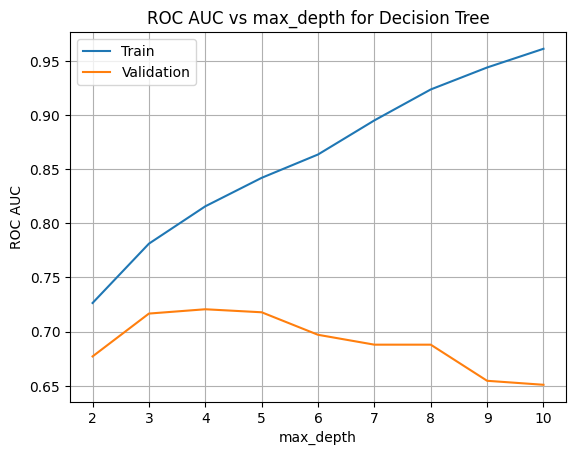

In [228]:
plt.plot(max_depths, roc_auc_scores_train, label='Train')
plt.plot(max_depths, roc_auc_scores_val, label='Validation')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs max_depth for Decision Tree')
plt.grid()
plt.legend()

In [229]:
dt_final = DecisionTreeClassifier(max_depth=4)
dt_final = dt_final.fit(X_train, target_train)

In [230]:
roc_auc_score(target_val, dt_final.predict_proba(X_val)[:, 1])

0.7205832918326693

In [231]:
from sklearn.tree import export_text
r = export_text(dt_final, feature_names=dv.feature_names_)
print(r)

|--- records=no <= 0.50
|   |--- seniority <= 2.50
|   |   |--- assets <= 7850.00
|   |   |   |--- amount <= 1325.00
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  1325.00
|   |   |   |   |--- class: 1
|   |   |--- assets >  7850.00
|   |   |   |--- age <= 45.00
|   |   |   |   |--- class: 0
|   |   |   |--- age >  45.00
|   |   |   |   |--- class: 1
|   |--- seniority >  2.50
|   |   |--- income <= 109.50
|   |   |   |--- home=rent <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- home=rent >  0.50
|   |   |   |   |--- class: 1
|   |   |--- income >  109.50
|   |   |   |--- amount <= 1450.00
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  1450.00
|   |   |   |   |--- class: 1
|--- records=no >  0.50
|   |--- income <= 95.50
|   |   |--- assets <= 3650.00
|   |   |   |--- job=fixed <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- job=fixed >  0.50
|   |   |   |   |--- class: 0
|   |   |--- assets >  3650.00
|   |   |   |--- seniority <= 2.50
|   |   |   | 